# Project_2._Game_Release_Forecast

# Шаг 1. Знакомство с данными.

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. И на основе этих данных мы отметим некоторые важные моменты, по которым отдел развития сможет планировать будущие продажи в 2017 году. 

На данном этапе нам нужно прочитать данные, сохранить их в датафрейм и изучить общую информацию о них

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [4]:
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Разделители не требуются, данные прочитываются нормально. Перед нами таблица с 11 колонками и 16715 строками. Пропуски в таблице присутствуют, названия столбцов не все соответствуют "змеиному регистру". Это, а также выявленные по ходу ошибки, если таковые будут, мы будем обрабатывать на следующем этапе. 

# Шаг 2. Предобработка данных

На данном этапе мы:
- изменим названия столбцов;
- заполним (или примем решение не заполнять) пропуски;
- преобразуем данные в нужные типы;
- добавим столбец суммарных продаж во всех регионах.

## переименовываем столбцы

In [5]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
df = df.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release' : 'year_of_release', 'Genre': 'genre', 
                        'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 'Other_sales': 'other_sales', 
                       'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'})
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## изменяем типы данных и обрабатываем пропуски. 

Пропущенные значения в столбце года оставим, потому что год - очень индивидуальные данные.

Удаляем 2 строки с пустым значением name. Они нам не нужны. 

In [7]:
import numpy as np
df['name'].replace('', np.nan, inplace=True)
df.dropna(subset=['name'], inplace=True)


Пропуски остались в области оценки игр и рейтинга от ESRB. Здесь мы пропуски оставим, чтобы не исказить данные. 
Осталось привести данные о продажах в миллионах к целым числам. Столбец user_score оставим во float64, потому что там оценка идет от 1 до 10, и пользователи могут оценивать дробным числом. Столбец critic_score тоже придется оставить, как есть из-за пропусков

Переведем значение столбца user_score в числовое значение, иначе с ним работать будет невозможно. К тому же, отпадет ошибка tbd и превратится в пропуск. Это будет лучший вариант обработки столбца пользовательского значения 

In [8]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


## проверяем дубликаты

In [9]:
print(df.duplicated().sum())

0


Дубликатов нет, двигаемся дальше

## считаем суммарные продажи во всех регионах и записываем их в отдельный столбец

In [10]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.info()
df.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  sum_sales        16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [11]:
df = df[df['sum_sales'] != 0]
df['sum_sales'].describe()

count    16711.000000
mean         0.533379
std          1.548364
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: sum_sales, dtype: float64

На этом этап предобработки данных завершен. Говоря о причинах пропусков, мы можем предположить, что пропуски в name - случайная ошибка, пропуски в critic_score, user_score и rating  - особенности выгрузки данных. Возможно, не все игры проходят оценку или ранжирование на возрастное ограничение. В разных странах разные законы. Переходим к следующему шагу. 

In [12]:

temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-------------------------')
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16711 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16711 non-null  object 
 2   year_of_release  16442 non-null  float64
 3   genre            16711 non-null  object 
 4   na_sales         16711 non-null  float64
 5   eu_sales         16711 non-null  float64
 6   jp_sales         16711 non-null  float64
 7   other_sales      16711 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  sum_sales        16711 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa en colores!

Удалим несколько строк, где год релиза пропущен. 

In [13]:
df = df.dropna(subset=['year_of_release'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  float64
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  sum_sales        16442 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


# Шаг 3. Исследовательский анализ данных

## Выведем на экран количество игр, выпущенных в разные годы

In [14]:
df['year_of_release'].value_counts().sort_index(ascending=True)

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1425
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: year_of_release, dtype: int64

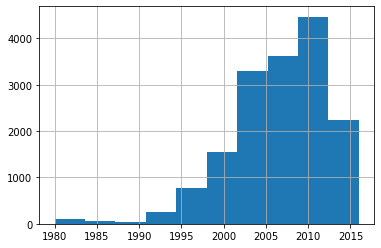

In [15]:
df['year_of_release'].hist();

На представленной гистограмме мы видим, как число выпускаемых игр возрастало до 2010 года, а потом начало убывать. Больше всего игр выпускалось с 2006 по 2011 года. 

In [16]:
df['platform'].value_counts()

PS2     2126
DS      2121
PS3     1305
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

## Выберем топ 5 платформ и считаем их продажи по всем регионам

In [17]:
top_5_platform = df.pivot_table(
    index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False).head()
top_5_platform.reset_index()

,platform,sum_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78


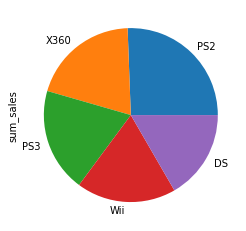

In [18]:
top_5_platform['sum_sales'].plot(kind='pie');

## Выберем топ 10 платформ и считаем распределение по годам

In [19]:
top_10_platform = df.pivot_table(
    index='year_of_release', values ='platform', aggfunc='count')
top_10_platform = top_10_platform.sort_values(by = 'platform', ascending = False)
top_10_platform = top_10_platform.head(10)
top_10_platform.head(20)

,platform
year_of_release,
2009.0,1426
2008.0,1425
2010.0,1255
2007.0,1197
2011.0,1136
2006.0,1006
2005.0,939
2002.0,829
2003.0,775


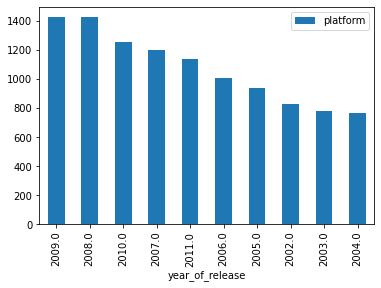

In [20]:
top_10_platform.plot(kind = 'bar');

## посмотрим на то, сколько лет в среднем существует платформа

Рассмотрим несколько платформ, топовых по сумме продаж

In [21]:
pl1 = df[df['platform'] == 'Wii']
pl1['year_of_release'].value_counts()

2009.0    325
2008.0    282
2010.0    253
2007.0    185
2011.0    143
2006.0     44
2012.0     31
2013.0     12
2014.0      6
2015.0      4
2016.0      1
Name: year_of_release, dtype: int64

In [22]:
pl2 = df[df['platform'] == 'PS2']
pl2['year_of_release'].value_counts()

2002.0    280
2005.0    260
2004.0    259
2006.0    259
2003.0    256
2007.0    214
2008.0    190
2001.0    185
2009.0     96
2000.0     82
2010.0     38
2011.0      7
Name: year_of_release, dtype: int64

In [23]:
pl3 = df[df['platform'] == 'X360']
pl3['year_of_release'].value_counts()

2011.0    206
2010.0    182
2009.0    172
2008.0    146
2007.0    123
2012.0    106
2006.0     93
2013.0     75
2014.0     63
2015.0     35
2005.0     18
2016.0     13
Name: year_of_release, dtype: int64

In [24]:
pl4 = df[df['platform'] == 'DS']
pl4['year_of_release'].value_counts()

2008.0    492
2009.0    403
2007.0    376
2010.0    323
2006.0    201
2011.0    153
2005.0    118
2012.0     23
2004.0     23
2013.0      8
1985.0      1
Name: year_of_release, dtype: int64

В среднем, платформа существует около 11 лет, а потом на смену ей приходят новые платформы

Данные можно взять за 2 последних года, и это будет актуальная подборка для прогноза на 2017 год. 

## создаем актуальный датафрейм, данные с 2013 до 2016 года

In [26]:
df_actual = df[df['year_of_release'] >= 2013]

In [27]:
#проверка
df_actual['year_of_release'].value_counts()

2015.0    606
2014.0    581
2013.0    544
2016.0    502
Name: year_of_release, dtype: int64

## выбираем несколько потенциально прибыльных платформ

In [28]:
df_actual['platform'].value_counts()

PS4     392
PSV     358
PS3     345
3DS     303
XOne    247
PC      189
X360    186
WiiU    115
PSP      67
Wii      23
DS        8
Name: platform, dtype: int64

In [29]:
pl1 = df_actual[df_actual['platform'] == 'PS4']

pl2015 = pl1[pl1['year_of_release'] == 2015]
pl2016 = pl1[pl1['year_of_release'] == 2016]
print('Доходы в 2015:', pl2015['sum_sales'].sum())
print('Доходы в 2016:', pl2016['sum_sales'].sum())
print('Игр выпущено:', pl1['year_of_release'].value_counts())

Доходы в 2015: 118.89999999999999
Доходы в 2016: 69.25
Игр выпущено: 2016.0    164
2015.0    137
2014.0     75
2013.0     16
Name: year_of_release, dtype: int64


Эта платформа работает! Возьмем ее на заметку

In [30]:
pl1 = df_actual[df_actual['platform'] == 'PSV']
pl2015 = pl1[pl1['year_of_release'] == 2015]
pl2016 = pl1[pl1['year_of_release'] == 2016]
print('Доходы в 2015:', pl2015['sum_sales'].sum())
print('Доходы в 2016:', pl2016['sum_sales'].sum())
print('Игр выпущено:', pl1['year_of_release'].value_counts())

Доходы в 2015: 6.25
Доходы в 2016: 4.25
Игр выпущено: 2015.0    110
2014.0    100
2016.0     85
2013.0     63
Name: year_of_release, dtype: int64


Игр много, а денег мало. Не берем!

In [31]:
pl1 = df_actual[df_actual['platform'] == 'XOne']
pl2015 = pl1[pl1['year_of_release'] == 2015]
pl2016 = pl1[pl1['year_of_release'] == 2016]
print('Доходы в 2015:', pl2015['sum_sales'].sum())
print('Доходы в 2016:', pl2016['sum_sales'].sum())
print('Игр выпущено:', pl1['year_of_release'].value_counts())

Доходы в 2015: 60.14
Доходы в 2016: 26.15000000000001
Игр выпущено: 2016.0    87
2015.0    80
2014.0    61
2013.0    19
Name: year_of_release, dtype: int64


In [32]:
pl1 = df_actual[df_actual['platform'] == '3DS']
pl2015 = pl1[pl1['year_of_release'] == 2015]
pl2016 = pl1[pl1['year_of_release'] == 2016]
print('Доходы в 2015:', pl2015['sum_sales'].sum())
print('Доходы в 2016:', pl2016['sum_sales'].sum())
print('Игр выпущено:', pl1['year_of_release'].value_counts())

Доходы в 2015: 27.78000000000001
Доходы в 2016: 15.139999999999999
Игр выпущено: 2013.0    91
2015.0    86
2014.0    80
2016.0    46
Name: year_of_release, dtype: int64


In [33]:
pl1 = df_actual[df_actual['platform'] == 'PS3']
pl2015 = pl1[pl1['year_of_release'] == 2015]
pl2016 = pl1[pl1['year_of_release'] == 2016]
print('Доходы в 2015:', pl2015['sum_sales'].sum())
print('Доходы в 2016:', pl2016['sum_sales'].sum())
print('Игр выпущено:', pl1['year_of_release'].value_counts())

Доходы в 2015: 16.820000000000004
Доходы в 2016: 3.5999999999999996
Игр выпущено: 2013.0    126
2014.0    108
2015.0     73
2016.0     38
Name: year_of_release, dtype: int64


Доходов нет

In [34]:
pl1 = df_actual[df_actual['platform'] == 'PC']
pl2015 = pl1[pl1['year_of_release'] == 2015]
pl2016 = pl1[pl1['year_of_release'] == 2016]
print('Доходы в 2015:', pl2015['sum_sales'].sum())
print('Доходы в 2016:', pl2016['sum_sales'].sum())
print('Игр выпущено:', pl1['year_of_release'].value_counts())

Доходы в 2015: 8.52
Доходы в 2016: 5.249999999999999
Игр выпущено: 2016.0    54
2015.0    50
2014.0    47
2013.0    38
Name: year_of_release, dtype: int64


Доходов нет

In [35]:
pl1 = df_actual[df_actual['platform'] == 'X360']
pl2015 = pl1[pl1['year_of_release'] == 2015]
pl2016 = pl1[pl1['year_of_release'] == 2016]
print('Доходы в 2015:', pl2015['sum_sales'].sum())
print('Доходы в 2016:', pl2016['sum_sales'].sum())
print('Игр выпущено:', pl1['year_of_release'].value_counts())

Доходы в 2015: 11.959999999999999
Доходы в 2016: 1.52
Игр выпущено: 2013.0    75
2014.0    63
2015.0    35
2016.0    13
Name: year_of_release, dtype: int64


In [36]:
pl1 = df_actual[df_actual['platform'] == 'WiiU']
pl2015 = pl1[pl1['year_of_release'] == 2015]
pl2016 = pl1[pl1['year_of_release'] == 2016]
print('Доходы в 2015:', pl2015['sum_sales'].sum())
print('Доходы в 2016:', pl2016['sum_sales'].sum())
print('Игр выпущено:', pl1['year_of_release'].value_counts())

Доходы в 2015: 16.350000000000005
Доходы в 2016: 4.6000000000000005
Игр выпущено: 2013.0    42
2014.0    31
2015.0    28
2016.0    14
Name: year_of_release, dtype: int64


In [37]:
pl1 = df_actual[df_actual['platform'] == 'Wii']
pl2015 = pl1[pl1['year_of_release'] == 2015]
pl2016 = pl1[pl1['year_of_release'] == 2016]
print('Доходы в 2015:', pl2015['sum_sales'].sum())
print('Доходы в 2016:', pl2016['sum_sales'].sum())
print('Игр выпущено:', pl1['year_of_release'].value_counts())

Доходы в 2015: 1.14
Доходы в 2016: 0.18
Игр выпущено: 2013.0    12
2014.0     6
2015.0     4
2016.0     1
Name: year_of_release, dtype: int64


In [37]:
pl1 = df_actual[df_actual['platform'] == 'PSP']
pl2015 = pl1[pl1['year_of_release'] == 2015]
pl2016 = pl1[pl1['year_of_release'] == 2016]
print('Доходы в 2015:', pl2015['sum_sales'].sum())
print('Доходы в 2016:', pl2016['sum_sales'].sum())
print('Игр выпущено:', pl1['year_of_release'].value_counts())

Доходы в 2015: 0.12000000000000001
Доходы в 2016: 0.0
Игр выпущено: 2013.0    54
2014.0    10
2015.0     3
Name: year_of_release, dtype: int64


Чем больше игр выпущено на базе платформы - тем у нее больше возможностей. При этом смотрим на доходы платформы. Итак, будем работать с платформами PS4, XOne, 3DS. Они самые перспективные

## график «ящик с усами»

Cтроим график с выбросами

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

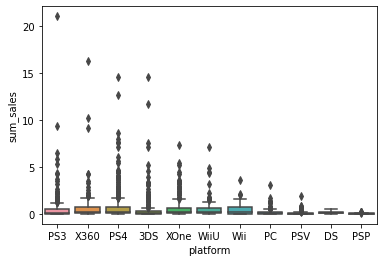

In [39]:
pll = df_actual['platform']
sales = df_actual['sum_sales']
sns.boxplot(x=pll, y=sales)
plt.show()

Меняем масштаб

(0.0, 2.0)

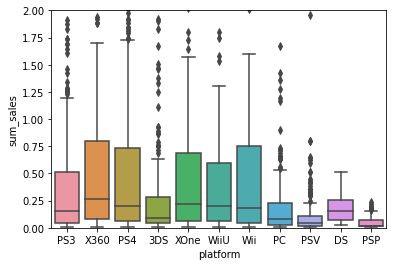

In [40]:
sns.boxplot(x=pll, y=sales)
plt.ylim(0,2)

Закомментировали старое решение

В данных присутствует много выбросов: платформы с некоторых игр получают экстремально большой доход, который искажает распределение. Попробуем исключить выбросы для построения ящика с усами

## влияние отзывов на продажи

### Создадим таблицу одной популярной платформы - PS4. Она современная и перспективная

In [42]:
df_final = df_actual[df_actual['platform'] == 'PS4']
df_final.info()         
df_final.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 31 to 16585
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             392 non-null    object 
 1   platform         392 non-null    object 
 2   year_of_release  392 non-null    float64
 3   genre            392 non-null    object 
 4   na_sales         392 non-null    float64
 5   eu_sales         392 non-null    float64
 6   jp_sales         392 non-null    float64
 7   other_sales      392 non-null    float64
 8   critic_score     252 non-null    float64
 9   user_score       257 non-null    float64
 10  rating           255 non-null    object 
 11  sum_sales        392 non-null    float64
dtypes: float64(8), object(4)
memory usage: 39.8+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


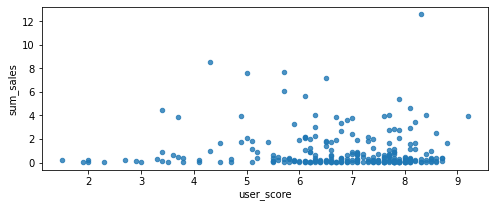

In [43]:
df_final.plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.8, figsize=(8, 3)) ;

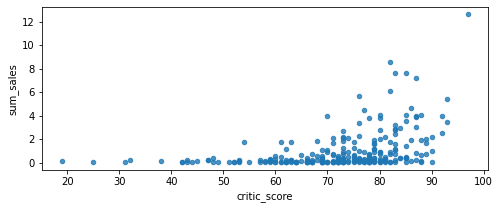

In [44]:
df_final.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.8, figsize=(8, 3)) ;

Делаем таблицу корреляции Пирсона

In [45]:
df_final[['sum_sales', 'user_score', 'critic_score']].corr()

,sum_sales,user_score,critic_score
sum_sales,1.000000,-0.031957,0.406568
user_score,-0.031957,1.000000,0.557654
critic_score,0.406568,0.557654,1.000000


Отметим, что на продажи больше влияет оценка критиков, чем пользователей. Некоторые игры пользователи оценили низко, но они все равно имеют большую выручку. Если говорить про оценку критиков, то самые продаваемые игры платформы в области оценки выше 75. 

### Вторая платформа XOne

In [46]:
df_final = df_actual[df_actual['platform'] == 'XOne']
df_final.info()         
df_final.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 99 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             247 non-null    object 
 1   platform         247 non-null    object 
 2   year_of_release  247 non-null    float64
 3   genre            247 non-null    object 
 4   na_sales         247 non-null    float64
 5   eu_sales         247 non-null    float64
 6   jp_sales         247 non-null    float64
 7   other_sales      247 non-null    float64
 8   critic_score     169 non-null    float64
 9   user_score       182 non-null    float64
 10  rating           186 non-null    object 
 11  sum_sales        247 non-null    float64
dtypes: float64(8), object(4)
memory usage: 25.1+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014.0,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015.0,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015.0,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22


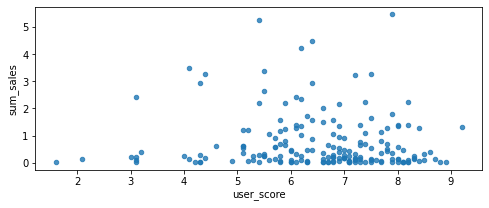

In [47]:
df_final.plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.8, figsize=(8, 3)) ;

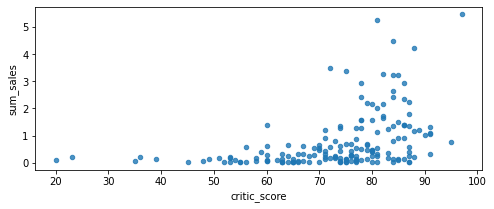

In [48]:
df_final.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.8, figsize=(8, 3)) ;

In [49]:
df_final[['sum_sales', 'user_score', 'critic_score']].corr()

,sum_sales,user_score,critic_score
sum_sales,1.000000,-0.068925,0.416998
user_score,-0.068925,1.000000,0.472462
critic_score,0.416998,0.472462,1.000000


### Третья платформа PSV

In [50]:
df_final = df_actual[df_actual['platform'] == 'PSV']
df_final.info()         
df_final.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 868 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             358 non-null    object 
 1   platform         358 non-null    object 
 2   year_of_release  358 non-null    float64
 3   genre            358 non-null    object 
 4   na_sales         358 non-null    float64
 5   eu_sales         358 non-null    float64
 6   jp_sales         358 non-null    float64
 7   other_sales      358 non-null    float64
 8   critic_score     77 non-null     float64
 9   user_score       99 non-null     float64
 10  rating           107 non-null    object 
 11  sum_sales        358 non-null    float64
dtypes: float64(8), object(4)
memory usage: 36.4+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
868,Minecraft,PSV,2014.0,Misc,0.18,0.64,0.90,0.24,NaN,NaN,NaN,1.96
2566,Killzone: Mercenary,PSV,2013.0,Shooter,0.20,0.39,0.04,0.17,78.0,8.9,M,0.80
2569,Final Fantasy X / X-2 HD Remaster,PSV,2013.0,Role-Playing,0.16,0.24,0.28,0.12,86.0,8.5,T,0.80
3086,Freedom Wars,PSV,2014.0,Role-Playing,0.15,0.10,0.32,0.08,73.0,8.3,T,0.65
3127,Borderlands 2,PSV,2014.0,Shooter,0.32,0.16,0.01,0.15,64.0,7.6,M,0.64


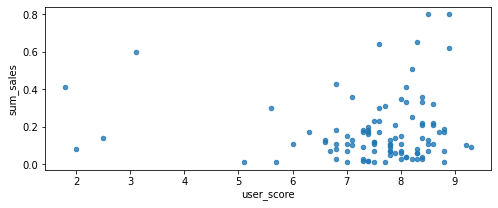

In [51]:
df_final.plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.8, figsize=(8, 3)) ;

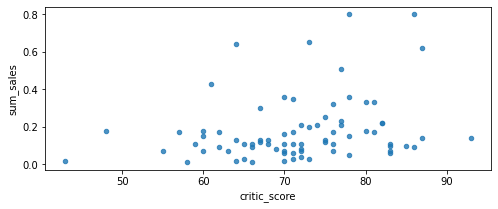

In [52]:
df_final.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.8, figsize=(8, 3)) ;

In [53]:
df_final[['sum_sales', 'user_score', 'critic_score']].corr()

,sum_sales,user_score,critic_score
sum_sales,1.000000,0.000942,0.254742
user_score,0.000942,1.000000,0.611521
critic_score,0.254742,0.611521,1.000000


### Четвертая платформа PS3

In [54]:
df_final = df_actual[df_actual['platform'] == 'PS3']
df_final.info()         
df_final.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 16 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             345 non-null    object 
 1   platform         345 non-null    object 
 2   year_of_release  345 non-null    float64
 3   genre            345 non-null    object 
 4   na_sales         345 non-null    float64
 5   eu_sales         345 non-null    float64
 6   jp_sales         345 non-null    float64
 7   other_sales      345 non-null    float64
 8   critic_score     121 non-null    float64
 9   user_score       186 non-null    float64
 10  rating           200 non-null    object 
 11  sum_sales        345 non-null    float64
dtypes: float64(8), object(4)
memory usage: 35.0+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
69,Call of Duty: Ghosts,PS3,2013.0,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
126,FIFA 14,PS3,2013.0,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
149,The Last of Us,PS3,2013.0,Action,2.41,2.18,0.28,0.99,95.0,9.1,M,5.86
180,Minecraft,PS3,2014.0,Misc,2.03,2.37,0.00,0.87,NaN,NaN,NaN,5.27


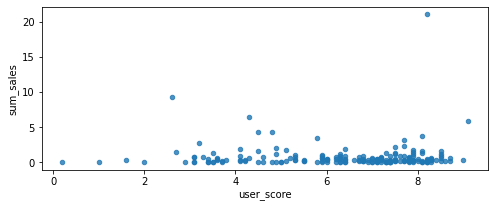

In [55]:
df_final.plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.8, figsize=(8, 3)) ;

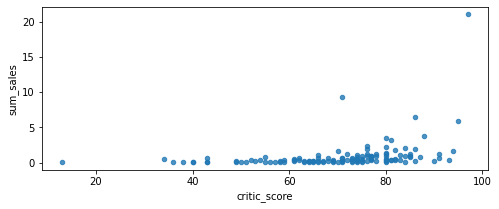

In [56]:
df_final.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.8, figsize=(8, 3)) ;

In [57]:
df_final[['sum_sales', 'user_score', 'critic_score']].corr()

,sum_sales,user_score,critic_score
sum_sales,1.000000,0.002394,0.334285
user_score,0.002394,1.000000,0.599920
critic_score,0.334285,0.599920,1.000000


### Последняя пятая платформа 3DS

In [58]:
df_final = df_actual[df_actual['platform'] == '3DS']
df_final.info()         
df_final.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 33 to 16677
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             303 non-null    object 
 1   platform         303 non-null    object 
 2   year_of_release  303 non-null    float64
 3   genre            303 non-null    object 
 4   na_sales         303 non-null    float64
 5   eu_sales         303 non-null    float64
 6   jp_sales         303 non-null    float64
 7   other_sales      303 non-null    float64
 8   critic_score     71 non-null     float64
 9   user_score       80 non-null     float64
 10  rating           104 non-null    object 
 11  sum_sales        303 non-null    float64
dtypes: float64(8), object(4)
memory usage: 30.8+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
96,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55
108,Pokemon Sun/Moon,3DS,2016.0,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN,7.14
184,Tomodachi Life,3DS,2013.0,Simulation,0.97,2.11,1.90,0.24,NaN,NaN,NaN,5.22


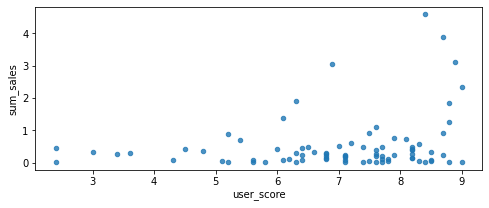

In [59]:
df_final.plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.8, figsize=(8, 3)) ;

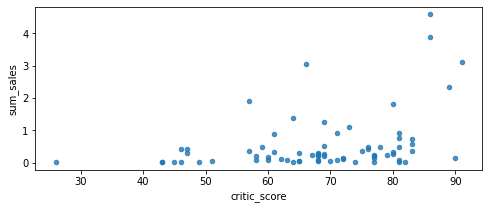

In [60]:
df_final.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.8, figsize=(8, 3)) ;

In [61]:
df_final[['sum_sales', 'user_score', 'critic_score']].corr()

,sum_sales,user_score,critic_score
sum_sales,1.000000,0.241504,0.357057
user_score,0.241504,1.000000,0.769536
critic_score,0.357057,0.769536,1.000000


Итак, сделаем вывод. По большей части, продажи зависят от оценок критиков. Хоть прямой зависимости и нету, но продажи выше там, где выше оценки критиков. Оценки пользователей почти не влияют на продажи. Показатель оценки пользователей приближается к показателю оценки критиков лишь на платформе 3DS, однако, на ней и показатель оценки критиков невелик. 

Делаем график на основе пяти топовых платформ. 

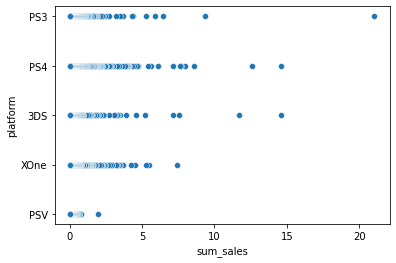

In [62]:
df_pl = df_actual[df_actual['platform'] != 'PSP']
df_pl = df_pl[df_pl['platform'] != 'DS']
df_pl = df_pl[df_pl['platform'] != 'Wii']
df_pl = df_pl[df_pl['platform'] != 'WiiU']
df_pl = df_pl[df_pl['platform'] != 'X360']
df_pl = df_pl[df_pl['platform'] != 'PC']

sns.scatterplot(data = df_pl, x = 'sum_sales', y = 'platform')
plt.show()

## проанализируем корреляцию продаж и жанров

In [63]:
dfg = df_actual.groupby(by = 'genre')['sum_sales'].median()
print(dfg)

genre
Action          0.110
Adventure       0.030
Fighting        0.125
Misc            0.100
Platform        0.225
Puzzle          0.060
Racing          0.120
Role-Playing    0.125
Shooter         0.450
Simulation      0.100
Sports          0.240
Strategy        0.080
Name: sum_sales, dtype: float64


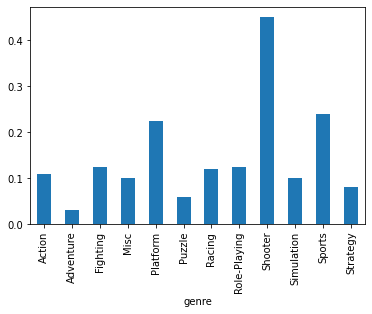

In [64]:
dfg.plot(kind = 'bar');

Итак, график показывает, что самые прибыльные жанры - это шутер, спорт и платформер. Далее идут все остальные жанры

# Шаг 4. Составьте портрет пользователя каждого региона

## портрет японца

In [65]:
df_platform_jp = df_actual[df_actual['jp_sales'] != 0]
df_platform_jp.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
60,Call of Duty: Ghosts,X360,2013.0,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013.0,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013.0,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


Импортируем нужную нам библиотеку

In [66]:
import plotly.express as px

In [68]:
fig = px.pie(df_actual, values='jp_sales', names='platform', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [69]:
df_platform_jp['platform'].value_counts()

PSV     316
PS3     236
3DS     235
PS4     223
PSP      66
WiiU     57
X360     31
XOne     22
Wii       1
Name: platform, dtype: int64

In [70]:
fig = px.pie(df_actual, values='jp_sales', names='genre', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [71]:
df_platform_jp['genre'].value_counts()

Action          400
Role-Playing    236
Adventure       165
Misc             90
Shooter          69
Sports           60
Fighting         59
Platform         28
Racing           26
Strategy         23
Simulation       21
Puzzle           10
Name: genre, dtype: int64

In [72]:
df_platform_jp['rating'].value_counts()

T       181
M       159
E        77
E10+     58
Name: rating, dtype: int64

In [73]:
fig = px.pie(df_actual, values='jp_sales', names='rating', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

Итак, в Японии за посление 2 года вышли игры на платформах 3DS, PS4, PSV, PS3 и WiiU (11%). 
По жанрам: экшн, ролевая игра, шутер, миск, приключение и симуляция. Экшн, ролевая игра и шутер занимают около 3/4 всех продаваемых игр
Больше всего продаются игры без оценки ESRB, а также с оценками Т

## портрет европейца

In [74]:
df_platform_eu= df_actual[df_actual['eu_sales'] != 0]
df_platform_eu.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
60,Call of Duty: Ghosts,X360,2013.0,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013.0,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013.0,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


In [75]:
fig = px.pie(df_actual, values='eu_sales', names='platform', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [76]:
df_platform_eu['platform'].value_counts()

PS4     290
XOne    218
PS3     212
PC      187
X360    169
3DS     122
WiiU     96
PSV      96
Wii      22
DS        8
PSP       2
Name: platform, dtype: int64

In [77]:
fig = px.pie(df_actual, values='eu_sales', names='genre', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [78]:
df_platform_eu['genre'].value_counts()

Action          494
Shooter         171
Sports          169
Role-Playing    155
Misc             80
Adventure        79
Racing           78
Platform         62
Fighting         49
Simulation       44
Strategy         34
Puzzle            7
Name: genre, dtype: int64

In [79]:
df_platform_eu['rating'].value_counts()

M       337
E       265
T       253
E10+    231
Name: rating, dtype: int64

In [80]:
fig = px.pie(df_actual, values='eu_sales', names='rating', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

На европейском рынке лидируют PS4 и Xone. 
В жанрах все более равномерно: шутер, спорт, экшн и ролевая игра. 
Популярные оценки - Е, М и Т

## портрет американца

In [81]:
df_platform_na= df_actual[df_actual['na_sales'] != 0]
df_platform_na.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
60,Call of Duty: Ghosts,X360,2013.0,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013.0,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013.0,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


In [82]:
fig = px.pie(df_actual, values='na_sales', names='platform', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [83]:
df_platform_na['platform'].value_counts()

PS4     294
XOne    227
PS3     211
X360    170
3DS     119
PSV      94
WiiU     92
PC       84
Wii      14
DS        4
Name: platform, dtype: int64

In [84]:
fig = px.pie(df_actual, values='na_sales', names='genre', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Хорошо сделан анализ и визуализирован круговыми диаграммами. Только в задании написано сдать для топ-5. А вот данные не вошедшие в ТОП, как правило, суммируют и выводят отдельной группой "Другие". Тогда видна общая картина. Сделаем, и по платформам, и по жанрам? Примерно вот так:</font>
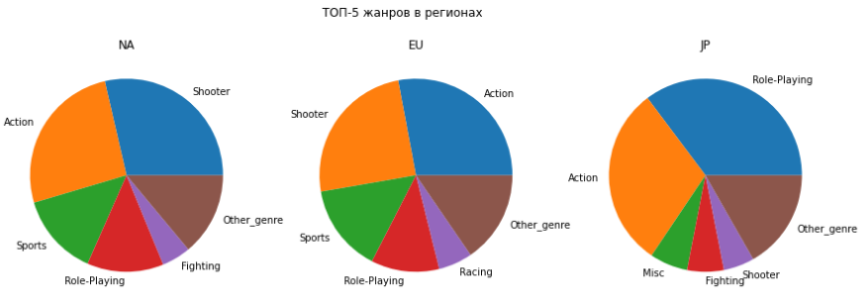

In [85]:
df_platform_na['genre'].value_counts()

Action          442
Shooter         171
Role-Playing    158
Sports          143
Misc             84
Adventure        80
Platform         67
Racing           55
Fighting         52
Simulation       28
Strategy         24
Puzzle            5
Name: genre, dtype: int64

In [86]:
df_platform_na['rating'].value_counts()

M       334
T       240
E10+    220
E       217
Name: rating, dtype: int64

In [87]:
fig = px.pie(df_actual, values='na_sales', names='rating', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [88]:
temp = df_actual.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

977 0.43752798925212716


M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

Геймеры Северной Америки предпочитают:
- платформы PS4, Xone и PC. Однако, здесь, в отличие от Европы, PS4 чуть меньше лидирует, а Xone чуть меньше отстает;
- также, как и в Европе, большую часть игр составляют шутер, экшн, спорт и ролевая игра. Чуть активнее, чем в Европе, покупают шутер и ролевую игру;
- Пользуются популярностью М, Е, Т и Е10+

# Шаг 5. Проверьте гипотезы

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [89]:
xbox = df_actual[df_actual['platform'] == 'XOne']
pc = df_actual[df_actual['platform'] == 'PC']

Нулевая гипотеза о равенстве средних двух генеральных совокупностей: рейтинги платформ Xbox One и PC. И мы ее проверяем. Гипотеза двухсторонняя, нам неважно, в какую сторону она будет изменяться. Н 0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые Н 1 - Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые, какой-то один, причем, неважно какой, больше

In [90]:
from scipy import stats as st

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    xbox['user_score'], 
    pc['user_score'], nan_policy = 'omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.14012658403611503
Не получилось отвергнуть нулевую гипотезу


Среднее пользовательское значение на этих платформах не одинаковое, получилось отвергнуть нулевую гипотезу. 

## Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза о неравенстве средних двух генеральных совокупностей: пользовательские рейтинги жанров Action и Sports. И мы ее проверяем. Гипотеза двухсторонняя, нам неважно, в какую сторону она будет изменяться. Н 0 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные Н 1 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

In [91]:
action = df_actual[df_actual['genre'] == 'Action']
sports = df_actual[df_actual['genre'] == 'Sports']

In [92]:
from scipy import stats as st

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    action['user_score'], 
    sports['user_score'], nan_policy = 'omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу") 

p-значение: 1.0517832389139422e-27
Не получилось отвергнуть нулевую гипотезу


Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

# Шаг 6. Напишите общий вывод

Когда мы делаем прогноз по выпуску игр, мы обязательно должны учитывать, какие жанры и платформы в разных регионах мира пользуются успехом. Так, мы разобрались, что в Японии и жанры, и платформы кардинальным образом отличаются от европейских жанров. В Японии реально продвинуть экшн на платформе 3DS. В то время, как в Европе и Америке более популярны другие платформы: PS4 и Xone. 
Еще один важный вывод: в среднем, платформа существует около 11 лет, а потом на смену ей приходят новые платформы. 
Число игр возрастало с 2002 по 2010, а потом стало падать. 
Изучили пользовательские значения: 
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые
- Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые